C:\Users\khodj\AppData\Local\Temp\ipykernel_19544\321458187.py:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Blues')


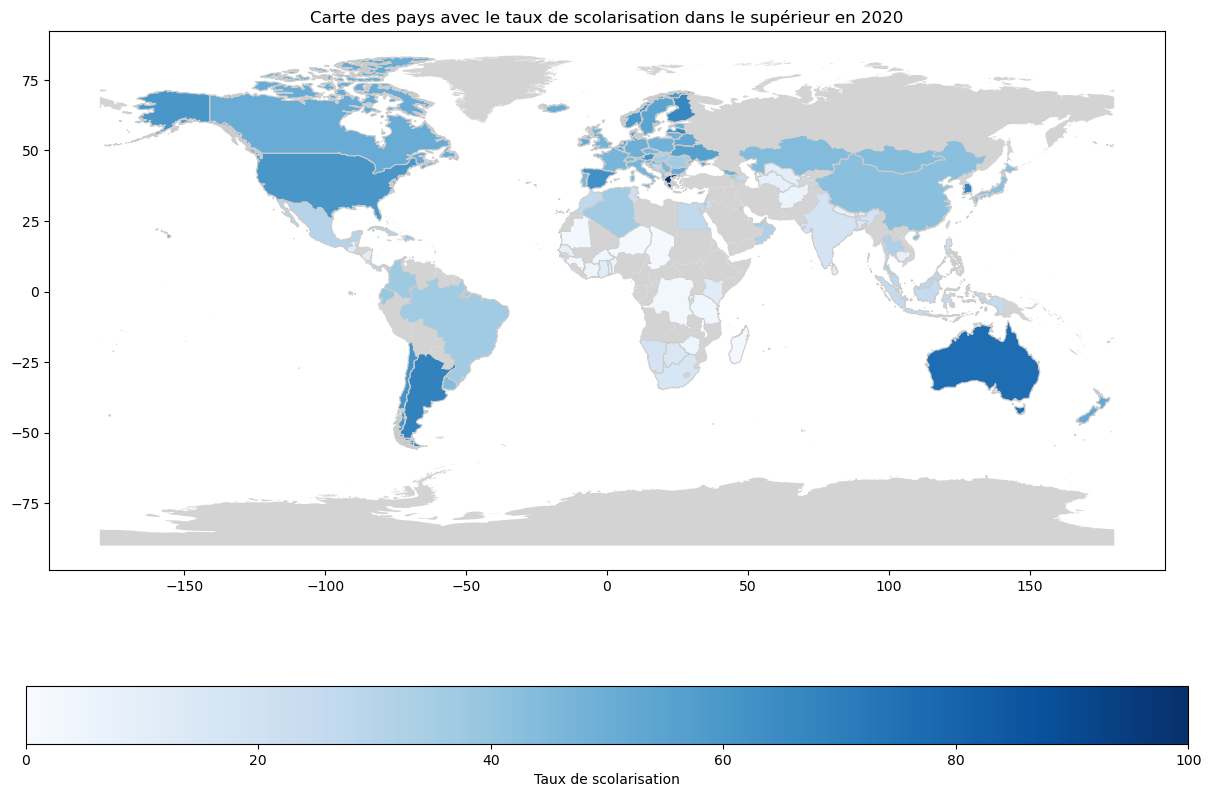

In [1]:
#Importation des bibliotheques
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

# Chargement des données depuis le fichier CSV
data = pd.read_csv('scolarite.csv', skiprows=3)

# Chargement des contours géographiques des pays
world = gpd.read_file('World_Countries.shp')

# Égaliser les noms des pays du fichier CSV avec ceux de la carte
world['COUNTRY'] = world['COUNTRY'].str.lower().str.strip()
data['Country Name'] = data['Country Name'].str.lower().str.strip()

# Fusionner les données du fichier CSV avec ceux des contours géographiques des pays
merged_data = world.merge(data, how='left', left_on='COUNTRY', right_on='Country Name')

# Identifier les pays sans données
merged_data['has_data'] = ~merged_data['2020'].isna()

# Mettre en gris les pays sans données
merged_data.loc[merged_data['has_data'] == False, 'color'] = 'lightgrey'

# Créer une échelle de couleurs allant de 0 à 100
cmap = plt.cm.get_cmap('Blues')
norm = Normalize(vmin=0, vmax=100)
sm = ScalarMappable(norm=norm, cmap=cmap)

# Afficher la carte avec les pays colorés en fonction des données
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_data.plot(column='2020', cmap=cmap, linewidth=0.8, ax=ax,
                 edgecolor='0.8')

# Ajouter les pays sans données en gris
merged_data[merged_data['has_data'] == False].plot(color='lightgrey', ax=ax)

# Créer une échelle de couleurs personnalisée
sm.set_array(merged_data['2020'])
cbar = plt.colorbar(sm, ax=ax, orientation='horizontal')

# Afficher le itre de la legende
cbar.set_label('Taux de scolarisation')

# Ajouter un titre à la carte
ax.set_title("Carte des pays avec le taux de scolarisation dans le supérieur en 2020")

# Afficher la carte
plt.show()

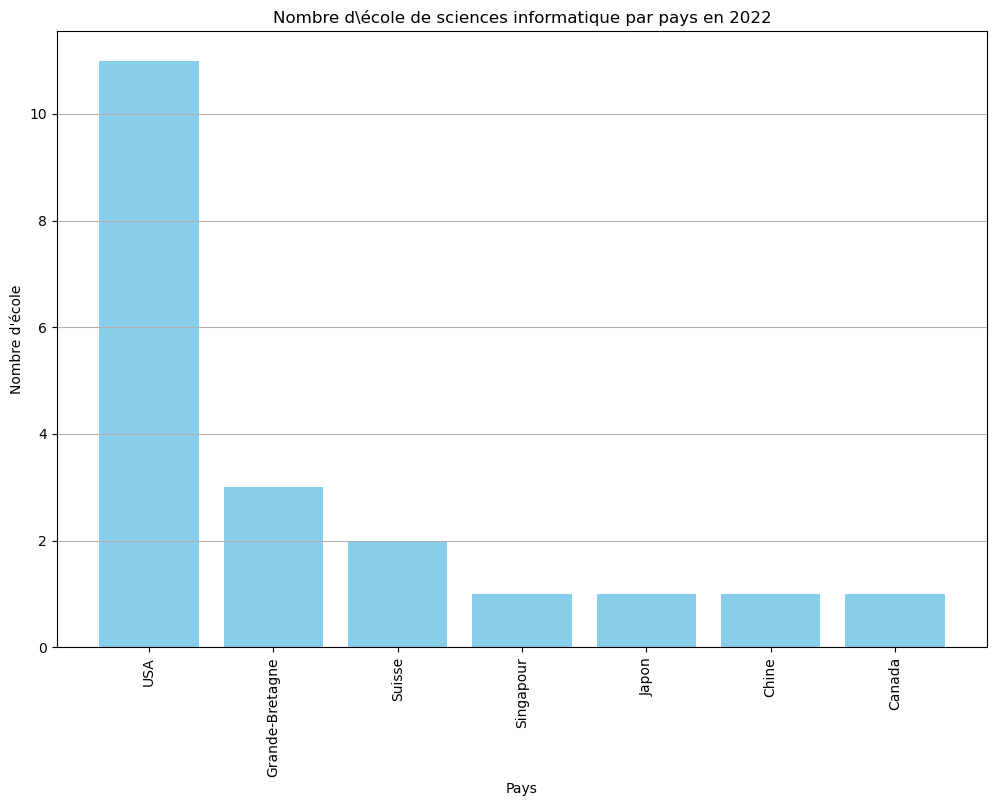

In [2]:
# Importation des bibliotheques
import pandas as pd
import matplotlib.pyplot as plt

# Chargement des donnee du fichier CSV
data = pd.read_csv('classement_ecole.csv')

# Compter le nombre d'écoles par pays
counts = data['PAYS'].value_counts()

# Créer le diagramme
plt.figure(figsize=(12, 8))
plt.bar(counts.index, counts.values, color='skyblue')

# Afficher le titre du graphique
plt.title('Nombre d\école de sciences informatique par pays en 2022')

# Afficher le titre des axes
plt.xlabel('Pays')
plt.ylabel('Nombre d\'école')

 # Faire pivoter les étiquettes de l'axe x si nécessaire
plt.xticks(rotation=90) 

# Afficher la grille uniquement sur l'axe y
plt.grid(axis='y')

# Afficher le graphique
plt.show()


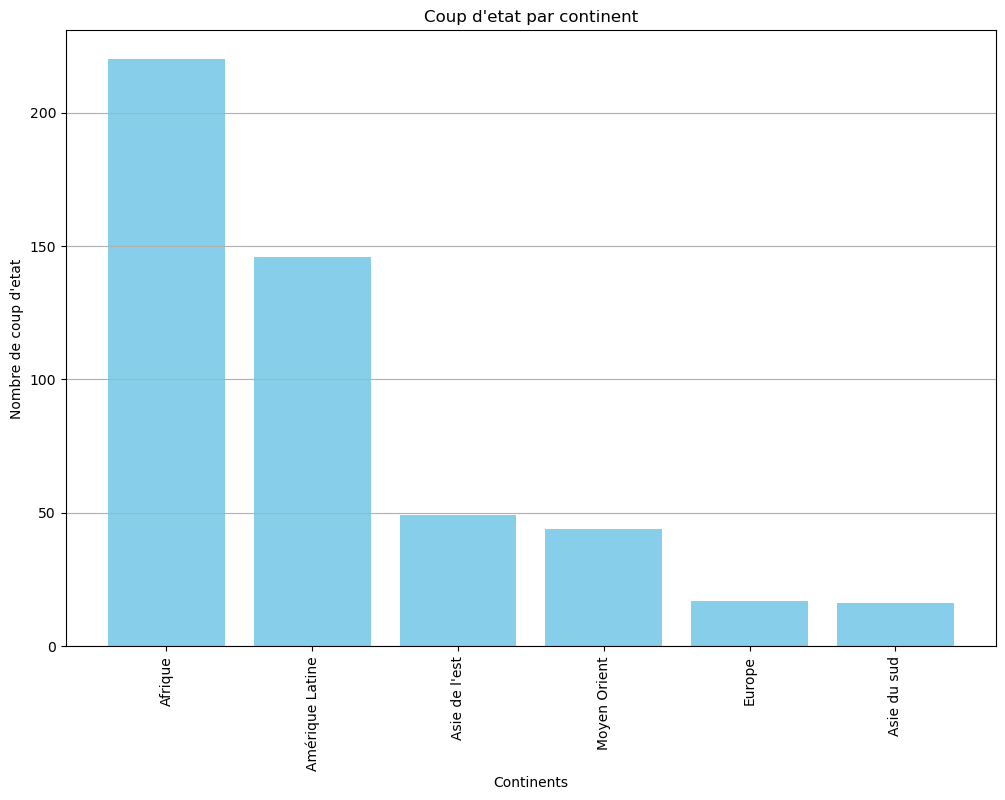

In [3]:
# Importation des bibliotheques
import pandas as pd
import matplotlib.pyplot as plt

# Chargement des donnee du fichier CSV
data = pd.read_csv('coupdetat.csv')

# Relever les continents
counts = data['Continent'].value_counts()

# Créer le diagramme
plt.figure(figsize=(12, 8))
plt.bar(counts.index, data["coup_detat"], color='skyblue')

# Afficher le titre du graphique
plt.title("Coup d'etat par continent")

# Afficher les titres des axes
plt.ylabel("Nombre de coup d'etat")
plt.xlabel("Continents")

# Faire pivoter les étiquettes de l'axe x si nécessaire
plt.xticks(rotation=90)

# Afficher la grille uniquement sur l'axe y
plt.grid(axis='y') 

# Afficher le graphique
plt.show()
